# Importing Needed Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

# Reading The Data

In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Weather_DataSet(1_1_2020)(1_6_2024).csv'
df = pd.read_csv(data_dir)

# Data Exploration

In [4]:
df.head()

,time,Temperature.2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,relHumidity.2M,totPrecip.s,Pressure,WindSpeed.10M
0,1/1/2020,12.36,5.59,8.98,11.26,9.35,17.26,7.90,5.68,66.75,0.02,100.59,1.04
1,1/2/2020,11.45,3.10,7.28,11.07,10.47,17.33,6.86,4.82,61.31,0.02,100.46,3.79
2,1/3/2020,10.65,2.45,6.55,10.71,9.86,16.19,6.33,4.58,61.38,0.07,100.64,6.59
3,1/4/2020,11.55,6.02,8.79,11.76,7.19,15.83,8.65,5.80,69.31,5.12,100.59,6.55
4,1/5/2020,10.63,2.59,6.62,10.73,11.76,17.20,5.44,4.58,59.94,0.00,100.59,4.93


In [5]:
df.tail()

,time,Temperature.2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,relHumidity.2M,totPrecip.s,Pressure,WindSpeed.10M
1609,5/28/2024,24.37,13.32,18.84,27.14,13.61,32.14,18.53,9.64,54.62,0.00,100.06,4.00
1610,5/29/2024,24.49,13.31,18.90,27.87,15.14,32.89,17.74,9.77,56.69,0.01,100.05,4.05
1611,5/30/2024,24.04,10.99,17.51,27.39,13.58,31.83,18.26,8.48,50.88,0.00,100.20,3.48
1612,5/31/2024,24.87,9.79,17.33,27.48,15.48,32.58,17.10,7.69,44.25,0.00,100.46,3.98
1613,6/1/2024,27.49,6.58,17.04,29.59,15.99,35.90,19.91,6.23,29.81,0.00,100.43,4.62


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            1614 non-null   object 
 1   Temperature.2M  1614 non-null   float64
 2   T2MDEW          1614 non-null   float64
 3   T2MWET          1614 non-null   float64
 4   TS              1614 non-null   float64
 5   T2M_RANGE       1614 non-null   float64
 6   T2M_MAX         1614 non-null   float64
 7   T2M_MIN         1614 non-null   float64
 8   QV2M            1614 non-null   float64
 9   relHumidity.2M  1614 non-null   float64
 10  totPrecip.s     1614 non-null   float64
 11  Pressure        1614 non-null   float64
 12  WindSpeed.10M   1614 non-null   float64
dtypes: float64(12), object(1)
memory usage: 164.0+ KB


In [7]:
df.describe()

,Temperature.2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,relHumidity.2M,totPrecip.s,Pressure,WindSpeed.10M
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,21.355756,11.026221,16.191047,22.633005,13.224752,28.685774,15.461053,8.723463,58.342813,0.401456,100.206778,3.832571
std,6.362075,4.786792,5.229224,7.302064,2.825533,7.244154,5.710509,2.724162,11.534322,2.418560,0.473664,1.101926
min,7.260000,-2.070000,4.540000,7.230000,5.100000,11.930000,2.550000,3.420000,15.690000,0.000000,98.670000,1.040000
25%,15.600000,7.272500,11.695000,15.930000,11.090000,22.152500,10.562500,6.410000,51.440000,0.000000,99.850000,3.120000
50%,21.875000,11.125000,16.355000,23.105000,13.070000,29.260000,15.680000,8.390000,58.845000,0.000000,100.210000,3.750000
75%,27.475000,15.227500,21.245000,29.605000,15.270000,35.327500,20.860000,11.050000,66.425000,0.060000,100.540000,4.450000
max,34.580000,21.800000,26.060000,37.230000,23.660000,43.730000,26.920000,16.540000,84.750000,59.820000,101.690000,8.800000


### Set Date column as an index

In [8]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace= True)

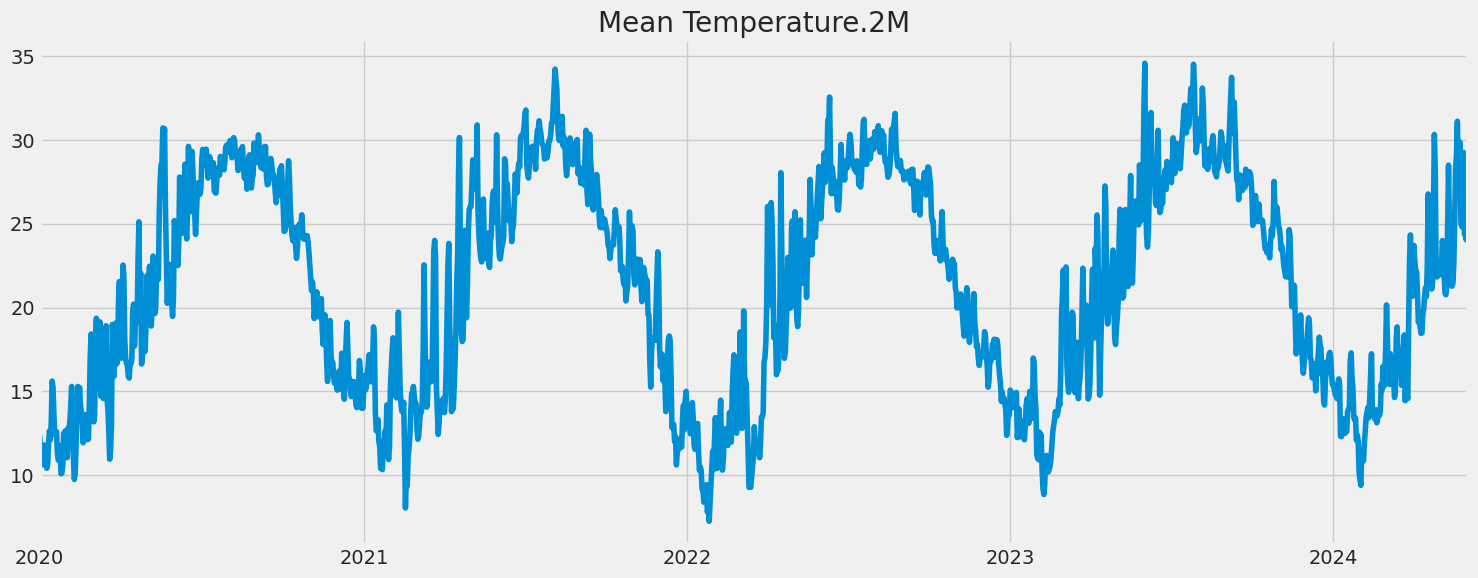

In [9]:
plt.figure(figsize=(15, 6))
df['Temperature.2M'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Temperature.2M")
plt.tight_layout()
plt.show()

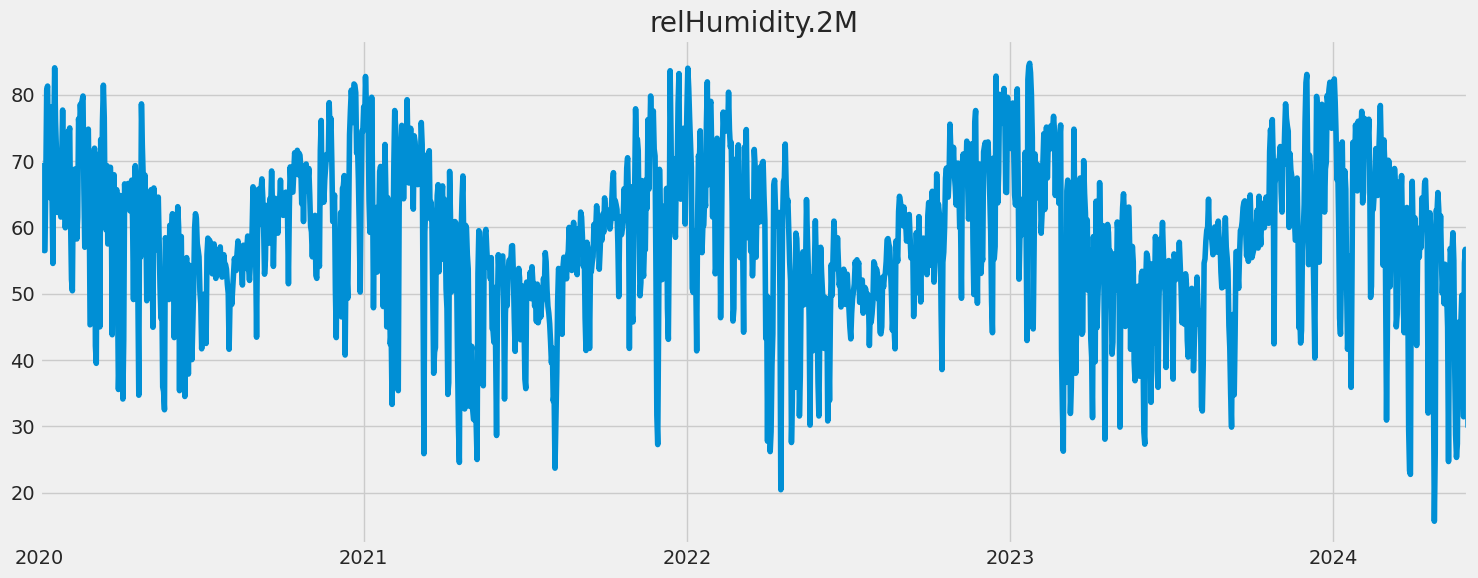

In [10]:
plt.figure(figsize=(15, 6))
df['relHumidity.2M'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("relHumidity.2M")
plt.tight_layout()
plt.show()

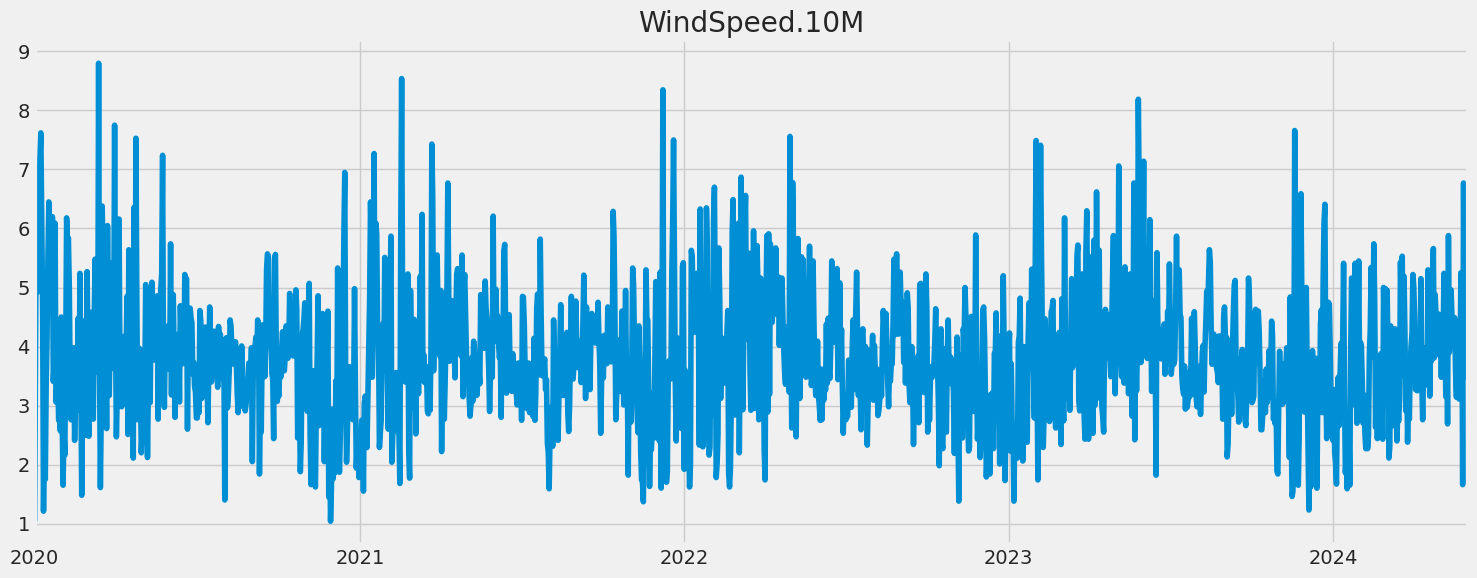

In [11]:
plt.figure(figsize=(15, 6))
df['WindSpeed.10M'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("WindSpeed.10M")
plt.tight_layout()
plt.show()

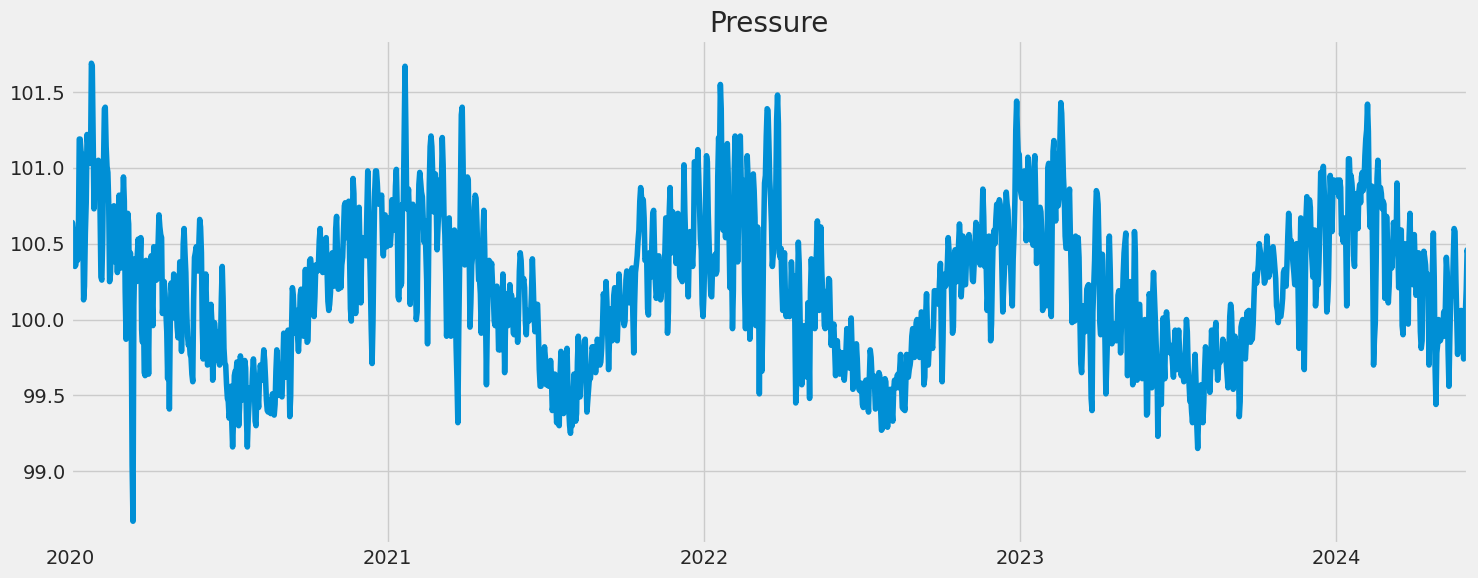

In [12]:
plt.figure(figsize=(15, 6))
df['Pressure'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Pressure")
plt.tight_layout()
plt.show()

# Data Preprocessing

### Choosing Prediction Column

In [13]:
n_cols = 1
dataset = df["Temperature.2M"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1614, 1)

### Normalizing Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Splitting Data

In [15]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1210 Test Size : 404


In [16]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1210, 1)

### Creating training set

In [17]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])

In [18]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [20]:
x_train.shape , y_train.shape

((1554, 60, 1), (1554, 1))

# LSTM Model

### Model Structure

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming x_train and n_cols are already defined
x_train_shape = (x_train.shape[1], n_cols)

# Build the model
model1 = Sequential()

# First LSTM layer
model1.add(LSTM(128, return_sequences=True, input_shape=x_train_shape))
model1.add(Dropout(0.2))

# Additional LSTM layers
for _ in range(1):
    model1.add(LSTM(128, return_sequences=True))
    model1.add(Dropout(0.2))

# Last LSTM layer without return_sequences
model1.add(LSTM(128, return_sequences=False))
model1.add(Dropout(0.4))

# Dense layers
model1.add(Dense(48))
model1.add(Dropout(0.4))
model1.add(Dense(n_cols))

# Compile the model
model1.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 48)                6

### Model Training

In [23]:
# Fitting the LSTM to the Training set
history1 = model1.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
39/39 [==============================] - 19s 344ms/step - loss: 0.0368 - mean_absolute_error: 0.1450 - val_loss: 0.0070 - val_mean_absolute_error: 0.0651
Epoch 2/100
39/39 [==============================] - 15s 379ms/step - loss: 0.0217 - mean_absolute_error: 0.1154 - val_loss: 0.0078 - val_mean_absolute_error: 0.0719
Epoch 3/100
39/39 [==============================] - 12s 299ms/step - loss: 0.0191 - mean_absolute_error: 0.1079 - val_loss: 0.0067 - val_mean_absolute_error: 0.0606
Epoch 4/100
39/39 [==============================] - 15s 396ms/step - loss: 0.0166 - mean_absolute_error: 0.0999 - val_loss: 0.0068 - val_mean_absolute_error: 0.0605
Epoch 5/100
39/39 [==============================] - 11s 291ms/step - loss: 0.0159 - mean_absolute_error: 0.0984 - val_loss: 0.0066 - val_mean_absolute_error: 0.0594
Epoch 6/100
39/39 [==============================] - 12s 298ms/step - loss: 0.0178 - mean_absolute_error: 0.1056 - val_loss: 0.0102 - val_mean_absolute_error: 0.0876
Epoc

### Model Evaluation

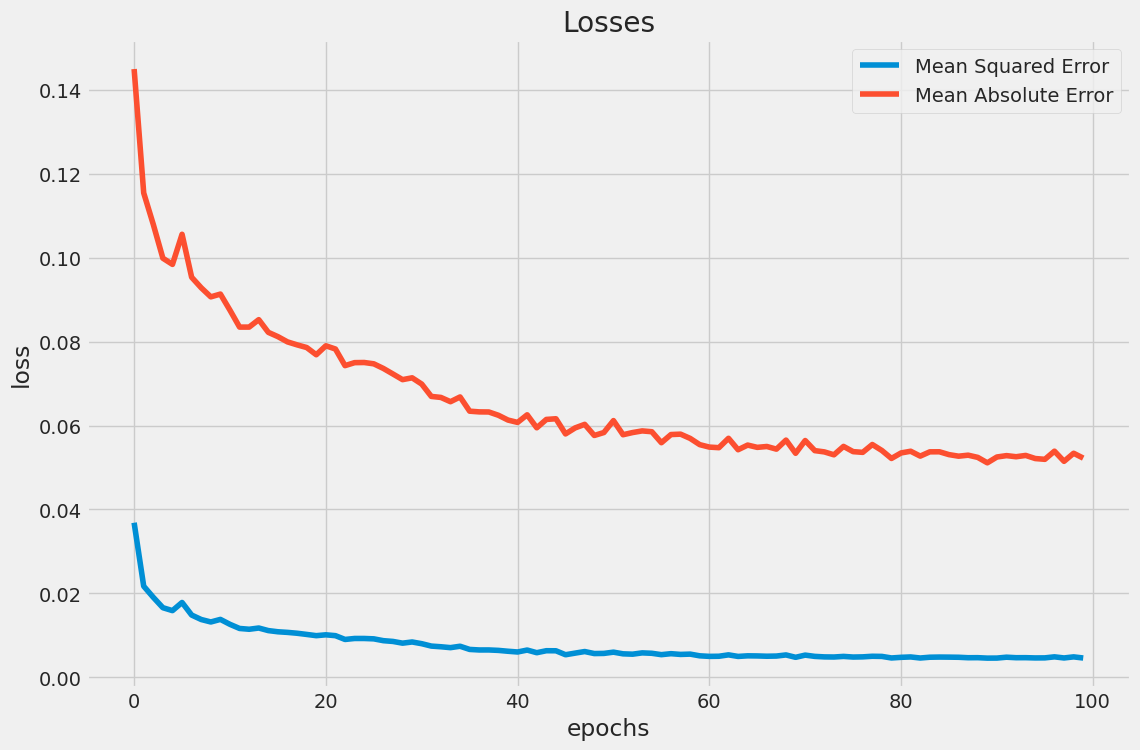

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(history1.history["loss"])
plt.plot(history1.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Predection

### Creating testing set

In [25]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [26]:
# Get Prediction
predictions = model1.predict(x_test)

13/13 [==============================] - 2s 76ms/step


In [27]:
predictions.shape

(404, 1)

In [28]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(404, 1)

### Root mean square error

In [29]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [30]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.18

In [31]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,20.928122,20.73
1,20.854307,22.44
2,22.462774,23.43
3,22.727291,20.60
4,20.071733,18.19
...,...,...
399,28.159042,24.37
400,23.473980,24.49
401,25.430452,24.04
402,24.044344,24.87


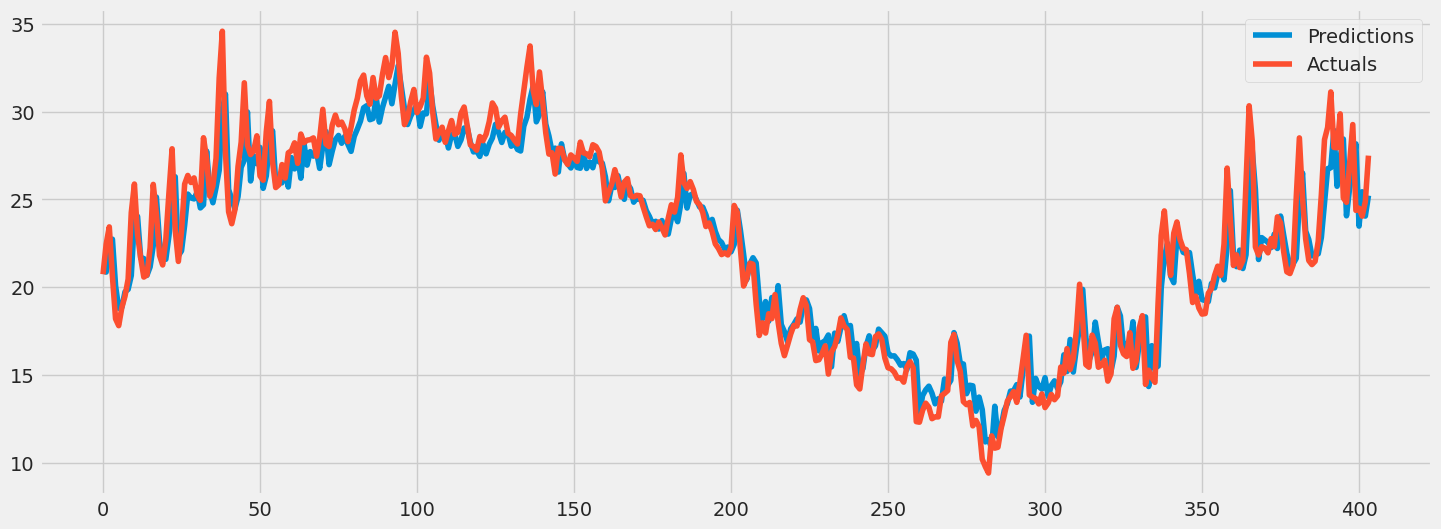

In [32]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

### Visualize Predictions with The Data
for one feature

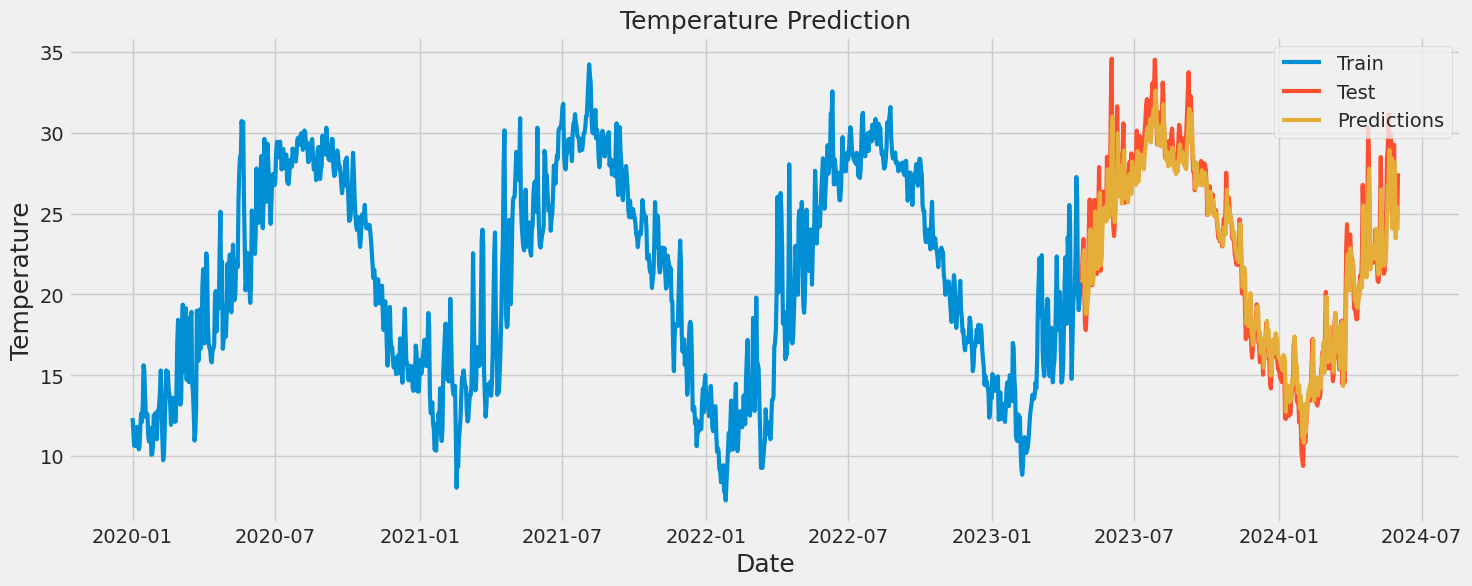

In [33]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Temperature Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Temperature', fontsize= 18)
plt.plot(train['Temperature.2M'], linewidth= 3)
plt.plot(test['Temperature.2M'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# Multivariate Predection

In [34]:
df.head()

,Temperature.2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,relHumidity.2M,totPrecip.s,Pressure,WindSpeed.10M
time,,,,,,,,,,,,
2020-01-01,12.36,5.59,8.98,11.26,9.35,17.26,7.90,5.68,66.75,0.02,100.59,1.04
2020-01-02,11.45,3.10,7.28,11.07,10.47,17.33,6.86,4.82,61.31,0.02,100.46,3.79
2020-01-03,10.65,2.45,6.55,10.71,9.86,16.19,6.33,4.58,61.38,0.07,100.64,6.59
2020-01-04,11.55,6.02,8.79,11.76,7.19,15.83,8.65,5.80,69.31,5.12,100.59,6.55
2020-01-05,10.63,2.59,6.62,10.73,11.76,17.20,5.44,4.58,59.94,0.00,100.59,4.93


### Chose Columns

In [35]:
n_cols = 4
cols = list(df.loc[:, ['Temperature.2M', 'relHumidity.2M', 'totPrecip.s', 'Pressure']])
dataset = df[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1614, 4)

## **Data Preprocessing**

### Data Normalization

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Data Splitting

In [37]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1210 Test Size : 404


In [38]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1210, 4)

### Creating Train Data

In [39]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 4

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])

In [40]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape

((1150, 60, 4), (1150, 4))

## **Model Structure**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming x_train and n_cols are already defined
x_train_shape = (x_train.shape[1], n_cols)

# Build the model
model2 = Sequential()

# First LSTM layer
model2.add(LSTM(32, return_sequences=True, input_shape=x_train_shape))
model2.add(Dropout(0.0))

# Additional LSTM layer
model2.add(LSTM(32, return_sequences=True))
model2.add(Dropout(0.0))

# Second LSTM layer
model2.add(LSTM(64, return_sequences=True))
model2.add(Dropout(0.2))

# Third LSTM layer
model2.add(LSTM(96, return_sequences=True))
model2.add(Dropout(0.4))

# Fourth LSTM layer
model2.add(LSTM(96, return_sequences=False))
model2.add(Dropout(0.3))

# Dense layers
model2.add(Dense(64))
model2.add(Dropout(0.2))
model2.add(Dense(n_cols))

# Compile the model
model2.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 32)            4736      
                                                                 
 dropout_4 (Dropout)         (None, 60, 32)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 32)            8320      
                                                                 
 dropout_5 (Dropout)         (None, 60, 32)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 64)            24832     
                                                                 
 dropout_6 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 96)           

### Model Training

In [44]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 100, batch_size= 32, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 18s 314ms/step - loss: 0.0522 - mean_absolute_error: 0.1699 - val_loss: 0.0156 - val_mean_absolute_error: 0.0885
Epoch 2/100
29/29 [==============================] - 5s 168ms/step - loss: 0.0212 - mean_absolute_error: 0.1101 - val_loss: 0.0173 - val_mean_absolute_error: 0.0976
Epoch 3/100
29/29 [==============================] - 5s 168ms/step - loss: 0.0197 - mean_absolute_error: 0.1056 - val_loss: 0.0112 - val_mean_absolute_error: 0.0715
Epoch 4/100
29/29 [==============================] - 6s 212ms/step - loss: 0.0177 - mean_absolute_error: 0.0985 - val_loss: 0.0122 - val_mean_absolute_error: 0.0804
Epoch 5/100
29/29 [==============================] - 5s 168ms/step - loss: 0.0168 - mean_absolute_error: 0.0957 - val_loss: 0.0117 - val_mean_absolute_error: 0.0776
Epoch 6/100
29/29 [==============================] - 6s 197ms/step - loss: 0.0169 - mean_absolute_error: 0.0944 - val_loss: 0.0146 - val_mean_absolute_error: 0.0897
Epoch 7/1

### Model Evaluation

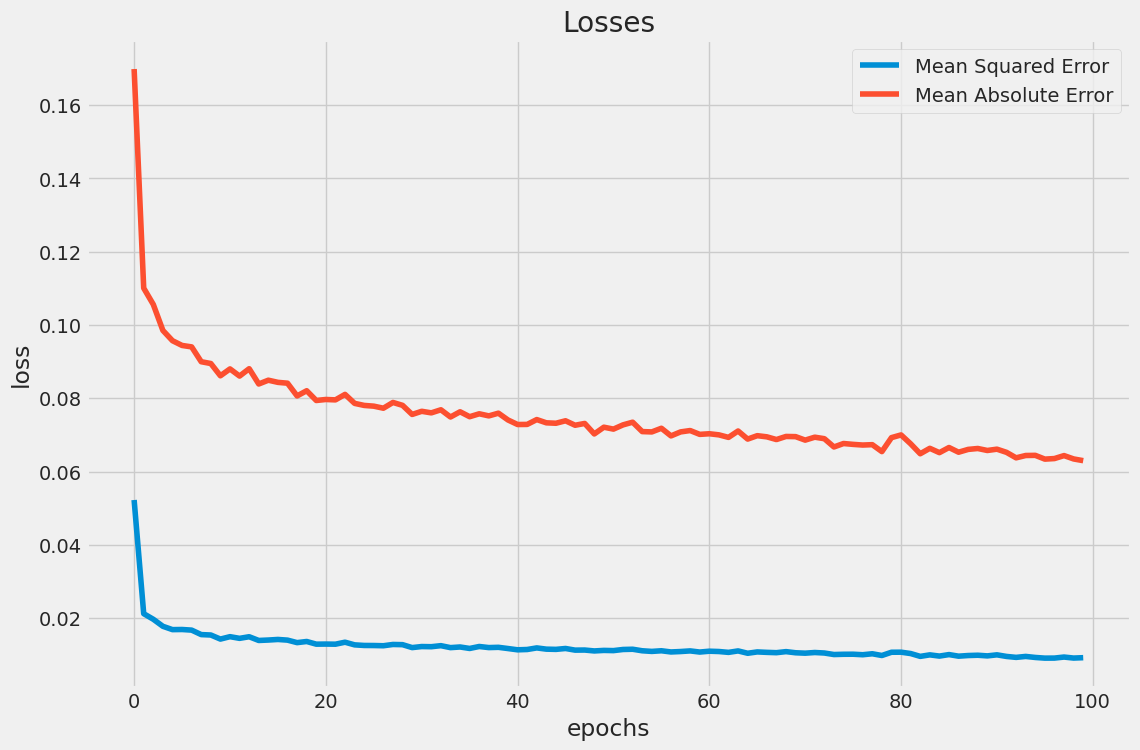

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(history2.history["loss"])
plt.plot(history2.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## **Prediction**


### Creating Test Data

In [46]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 4

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [47]:
x_test.shape , y_test.shape

((404, 60, 4), (404, 4))

In [48]:
# Get Prediction
predictions = model2.predict(x_test)

13/13 [==============================] - 3s 63ms/step


In [49]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [50]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

44.55

## **Forcasting**

In [51]:
import numpy as np
import pandas as pd
from datetime import timedelta

def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

# Set future to 150 days
future = 214

# Initialize lists for forecast and time
forcast = []
time = []

# Extract the last sample from the test set
Xin = x_test[-1 :, :, :]

# Loop to generate forecast for 150 days
for i in range(0, future):
    out = model2.predict(Xin, batch_size=5)
    forcast.append(out[0])
    print(forcast)
    Xin = insert_end(Xin, out[0, 0])
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i + 1))

# Convert the forecast list to a numpy array
forcasted_output = np.asarray(forcast)

# Inverse transform the forecasted data
forcasted_output = scaler.inverse_transform(forcasted_output)

# Create DataFrame for the forecasted output
forcasted_output = pd.DataFrame(forcasted_output)

# Create DataFrame for the dates
date = pd.DataFrame(time)

# Concatenate the two DataFrames
df_result = pd.concat([date, forcasted_output], axis=1)

# Set column names for the final DataFrame
df_result.columns = ["time", 'Temperature.2M', 'relHumidity.2M', 'totPrecip.s', 'Pressure']

# Display the first few rows of the final DataFrame
df_result.head()


1/1 [==============================] - 0s 97ms/step
[array([0.68501204, 0.51837736, 0.00320739, 0.43038875], dtype=float32)]
1/1 [==============================] - 0s 81ms/step
[array([0.68501204, 0.51837736, 0.00320739, 0.43038875], dtype=float32), array([0.69261503, 0.51610523, 0.00318202, 0.42244446], dtype=float32)]
1/1 [==============================] - 0s 67ms/step
[array([0.68501204, 0.51837736, 0.00320739, 0.43038875], dtype=float32), array([0.69261503, 0.51610523, 0.00318202, 0.42244446], dtype=float32), array([0.6972482 , 0.5154737 , 0.00312672, 0.41564906], dtype=float32)]
1/1 [==============================] - 0s 57ms/step
[array([0.68501204, 0.51837736, 0.00320739, 0.43038875], dtype=float32), array([0.69261503, 0.51610523, 0.00318202, 0.42244446], dtype=float32), array([0.6972482 , 0.5154737 , 0.00312672, 0.41564906], dtype=float32), array([0.69650304, 0.51903725, 0.00300824, 0.41163075], dtype=float32)]
1/1 [==============================] - 0s 64ms/step
[array([0.685012

,time,Temperature.2M,relHumidity.2M,totPrecip.s,Pressure
0,2024-06-02,25.974529,51.489143,0.191866,99.969772
1,2024-06-03,26.182243,51.332230,0.190348,99.945786
2,2024-06-04,26.308821,51.288616,0.187041,99.925255
3,2024-06-05,26.288464,51.534714,0.179953,99.913124
4,2024-06-06,26.247383,51.808449,0.168451,99.902023


In [ ]:
df_result

In [ ]:
# Save the DataFrame to a specified path
csv_path = '/content/drive/MyDrive/Colab Notebooks/forecast_results.csv'
df_result.to_csv(csv_path, index=False)

print(f"Forecast results saved to {csv_path}")

<ipython-input-56-e627ec787ea7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


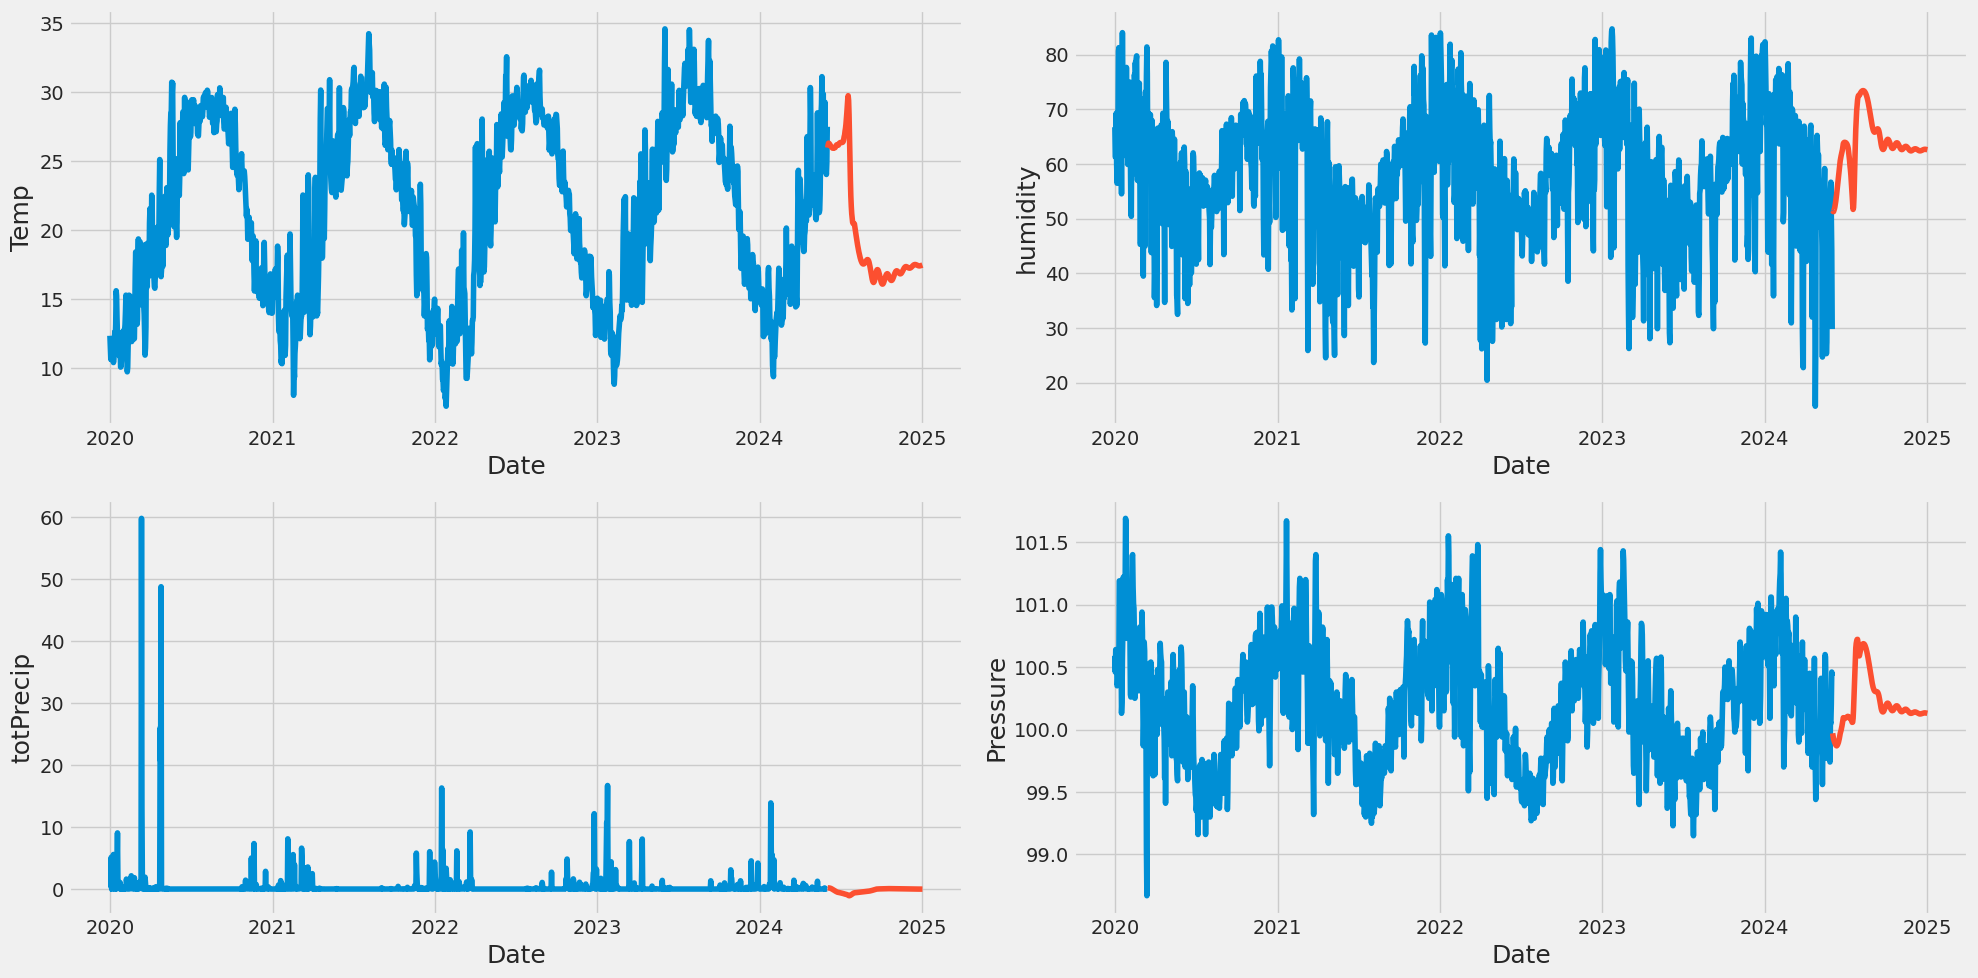

In [56]:
plt.figure(figsize=(20, 10))
plt.title('Next 30 Days')

plt.subplot(2, 2, 1)
plt.plot(df['Temperature.2M'])
plt.plot(df_result.set_index('time')[['Temperature.2M']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temp' ,fontsize=18)

plt.subplot(2, 2, 2)
plt.plot(df['relHumidity.2M'])
plt.plot(df_result.set_index('time')[['relHumidity.2M']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('humidity' ,fontsize=18)

plt.subplot(2, 2, 3)
plt.plot(df['totPrecip.s'])
plt.plot(df_result.set_index('time')[['totPrecip.s']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('totPrecip' ,fontsize=18)

plt.subplot(2, 2, 4)
plt.plot(df['Pressure'])
plt.plot(df_result.set_index('time')[['Pressure']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Pressure' ,fontsize=18)

plt.tight_layout()
plt.show()

In [55]:
import pandas as pd

weather_data = pd.read_csv(data_dir, parse_dates=['time'])

start_date = '2024-01-01'
end_date = '2024-06-1'
weather_data_2024 = weather_data[(weather_data['time'] >= start_date) & (weather_data['time'] <= end_date)]

combined_data = pd.concat([weather_data_2024, df_result])

combined_csv_path = '/content/drive/MyDrive/Colab Notebooks/weather_forecast.csv'
combined_data.to_csv(combined_csv_path, index=False)

print(f"Combined data saved to {combined_csv_path}")


Combined data saved to /content/drive/MyDrive/Colab Notebooks/weather_forecast.csv
Combined data saved to /content/drive/MyDrive/Colab Notebooks/weather_forecast.csv


In [57]:
import pickle

# Save the model as an H5 file
model2.save('/content/drive/MyDrive/weather forecasting model/saved_model.h5')

# Save the model as a PKL file
with open('/content/drive/MyDrive/weather forecasting model/saved_model.pkl', 'wb') as file:
    pickle.dump(model2, file)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
